In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tsnake.gan as gan

# Load and display the grayscale image, raw input mask

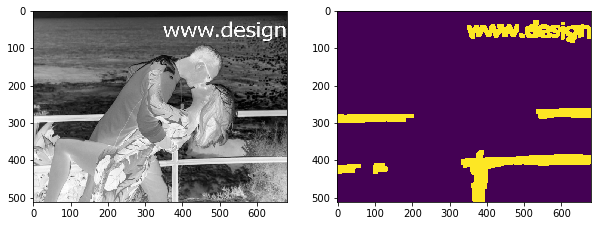

In [2]:
msk_path = './examples/places2/case1_mask.png'
img_path = './examples/places2/case1_raw.png'

mask = gan.load_mask(msk_path)
image = gan.load_grayscale_image(img_path)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(image, cmap=plt.cm.binary)
ax2.imshow(mask)
plt.show()

# Compute bounding boxes for each distinct masked region 

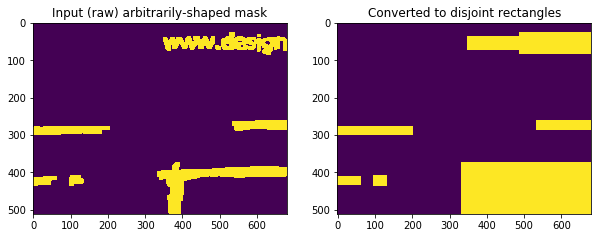

In [3]:
regions = gan._find_disjoint_masked_regions(mask)

gan.visualize_masked_regions(mask, regions)

# Display the sub-images that will each be processed separately

* @cole: The red lines are the initial T-snakes. I tried to get the initial snake to closely follow the user-defined mask, but it's clearly not perfect

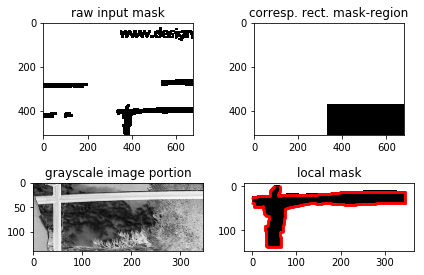

MaskedRegion(rows=372:511, cols=331:679)


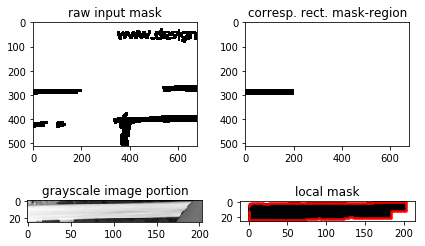

MaskedRegion(rows=275:300, cols=0:204)


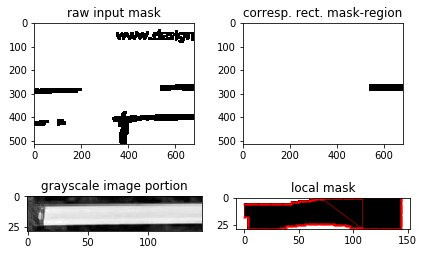

MaskedRegion(rows=259:288, cols=534:679)


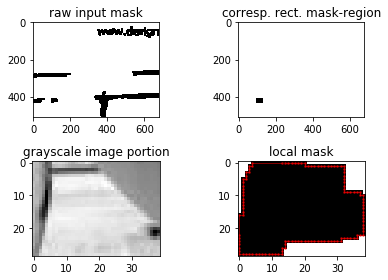

MaskedRegion(rows=407:436, cols=96:135)


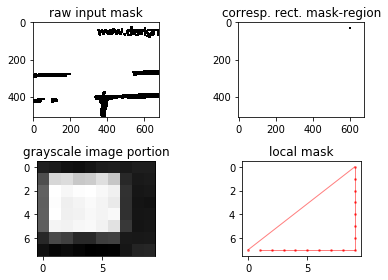

MaskedRegion(rows=29:37, cols=600:610)


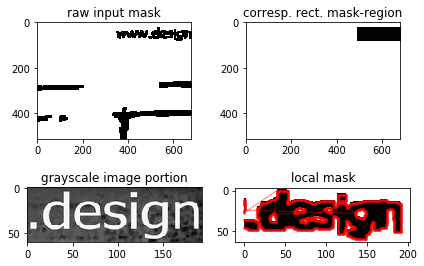

MaskedRegion(rows=24:84, cols=486:679)


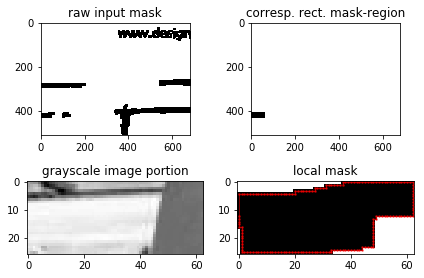

MaskedRegion(rows=409:435, cols=0:63)


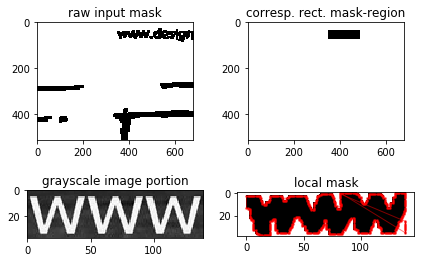

MaskedRegion(rows=35:73, cols=347:487)


In [4]:
regions = gan.compute_masked_regions(image, mask)

for region in regions:
    tsnake = region.initialize_tsnake(
        N=1000, p=1.0, c=1.0, sigma=1.0
    )
    print('================')
    region.visualize()
    print(region)
    

# placeholder

In [5]:
region = regions[0]

region.raw_mask_portion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
nodes = np.random.randn(10, 2)
nodes[[0, -1]]

array([[ 0.84439729, -1.11631279],
       [ 0.52842586,  0.12835064]])